# CS145: Project 3 | Education and Health of Countries




## Collaborators:
Please list the names and SUNet IDs of your collaborators below:
* *Kaitlin Hsu, khsu18*
* *Eunji Lee, elee0324*

## Project Overview?

---
How does health and well being correlate with education level on the nationwide level?

---


## Analysis of Dataset

---

World bank health population: contains 5 tables, approx size 280 MB, contains information collected by the world bank about different countries around the world and data related to the health of its citizens (such as malnutrition rate, rate of STDs, average price of being treated for various medical conditions, maternal leave benefits, etc., and many more factors)

1. country_series_defintions really only used in conjunction with series_summary and series_times, and we probably will then use country_summary with health_nutrition_population
2. Really arbitrary divisions in country_summary table (e.g. includes east Asia & pacific but then also includes Korea)
3. There are negatively correlated things, like obesity rates and STD rates, but there are are also ambiguous/positive things, like health expenditure per capita

How should we divide countries? Probably should exclude the larger groupings because we want to the granular country to country data, but lmk what u think

How exactly do we want to measure health? Probably choose a couple traits with a good mix of negative positive and more ambiguous? Lmk if there are things you’re particularly interested in

If there are time duplicates, we should use the most recently collected data

----

## Data Exploration

In [1]:
# Run this cell to authenticate yourself to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "cs145-pset-1"

In [2]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

In [3]:
# Add imports for any visualization libraries you may need
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

---
### 1) Measuring education
#### (x-axis: country, y-axis: # average school enrollment rate)

To keep the chart readable, we've only kept the 20 countries with the highest average school enrollment rate, aggregating primary, secondary, and tertiary, along with both men and women, from 2015 onwards.



In [ ]:
%%bigquery --project $project_id p1e

SELECT country_name, AVG(value) avg_enrollment
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
WHERE indicator_name LIKE 'School enrollment%'
AND year >= 2015
GROUP BY country_name
ORDER BY avg_enrollment DESC
LIMIT 20

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(p1e["country_name"], p1e["avg_enrollment"])
plt.xticks(p1e["country_name"], rotation='vertical')
plt.title("Measuring Education")
plt.xlabel("Country")
plt.ylabel("Average school enrollment rate")
plt.show()

#### 1a) Exploring school enrollment rate

"'Gross' enrollment includes students of all ages. In other words, it includes students whose age exceeds the official age group (e.g. repeaters). Thus, if there is late enrollment, early enrollment, or repetition, the total enrollment can exceed the population of the age group that officially corresponds to the level of education – leading to ratios greater than 100 percent"[1]



[1] https://datahelpdesk.worldbank.org/knowledgebase/articles/114955-how-can-gross-school-enrollment-ratios-be-over-100


In [ ]:
%%bigquery --project $project_id p1e

SELECT country_name, AVG(value) avg_enrollment
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
WHERE indicator_name LIKE 'School enrollment%'
AND year >= 2015
GROUP BY country_name
ORDER BY avg_enrollment DESC
LIMIT 20

---
### 2) Exploring health
#### 2a) Health expenditure per capita: (x-axis: country, y-axis: # average health expenditure per capita)

To keep the chart readable, we've only kept the 20 countries with the highest average health expenditure per capita from 2015 onwards.



In [ ]:
%%bigquery --project $project_id p2a

SELECT country_name, AVG(value) avg_expenditure
FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
WHERE indicator_name LIKE 'Current health expenditure per capita%'
AND country_name NOT LIKE 'North America'
AND country_name NOT LIKE 'Post-demographic dividend'
AND country_name NOT LIKE 'High income'
AND country_name NOT LIKE 'OECD members'
AND country_name NOT LIKE 'Euro area'
AND year >= 2015
GROUP BY country_name
ORDER BY avg_expenditure DESC
LIMIT 20

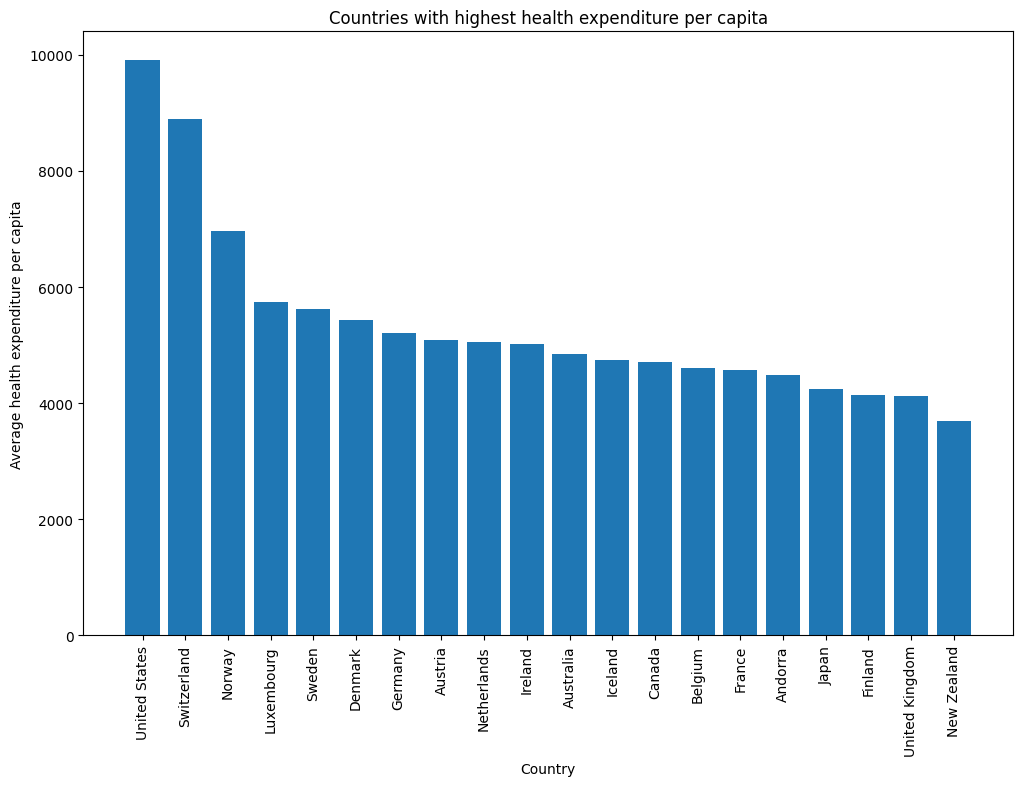

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(p2a["country_name"], p2a["avg_expenditure"])
plt.xticks(p2a["country_name"], rotation='vertical')
plt.title("Countries with highest health expenditure per capita")
plt.xlabel("Country")
plt.ylabel("Average health expenditure per capita")
plt.show()

#### 2b) Life expectancy

(x-axis: expected age, y-axis: # of countries with that life expectancy)

In [ ]:
%%bigquery --project $project_id p2b

SELECT ROUND(avg_life_expectancy, 0) round_avg_life_exp, COUNT(avg_life_expectancy) count
FROM (
  SELECT country_name, AVG(value) avg_life_expectancy
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Life expectancy%'
  AND year >= 2015
  GROUP BY country_name
)
GROUP BY round_avg_life_exp
ORDER BY round_avg_life_exp

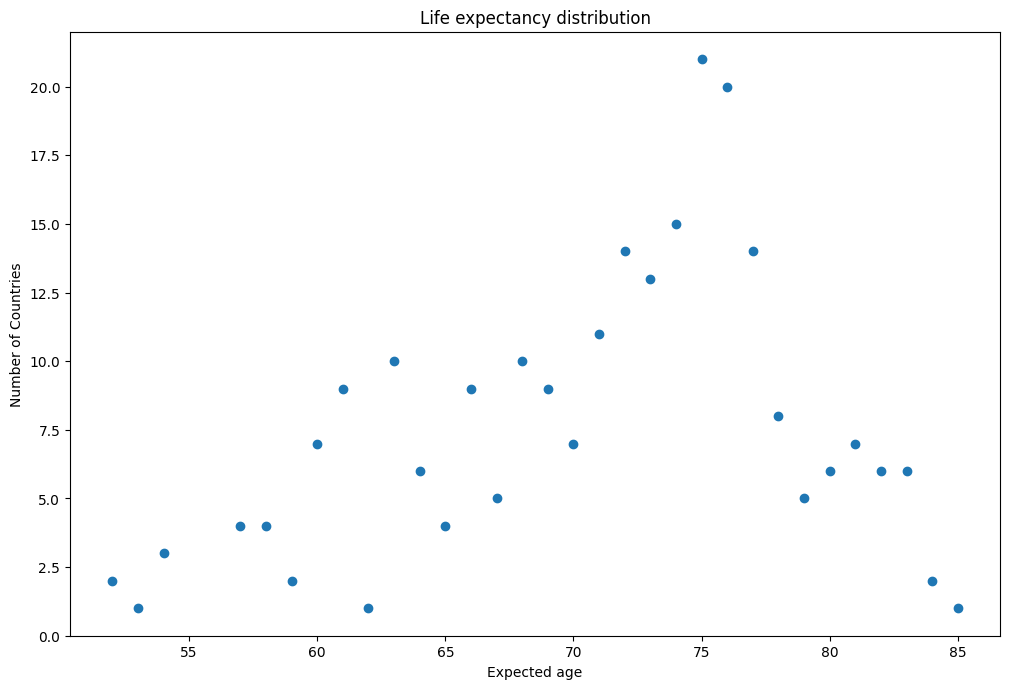

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(p2b["round_avg_life_exp"], p2b["count"])
plt.title("Life expectancy distribution")
plt.xlabel("Expected age")
plt.ylabel("Number of Countries")
plt.show()

#### 2c) Prevalence of Obesity

(x-axis: country, y-axis: # average health expenditure per capita)

In [ ]:
%%bigquery --project $project_id p2c

SELECT ROUND(avg_obesity, 0) round_avg_obesity, COUNT(avg_obesity) count
FROM (
  SELECT country_name, AVG(value) avg_obesity
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Prevalence of overweight (% of adults)'
  AND year >= 2015
  GROUP BY country_name
)
GROUP BY round_avg_obesity
ORDER BY round_avg_obesity

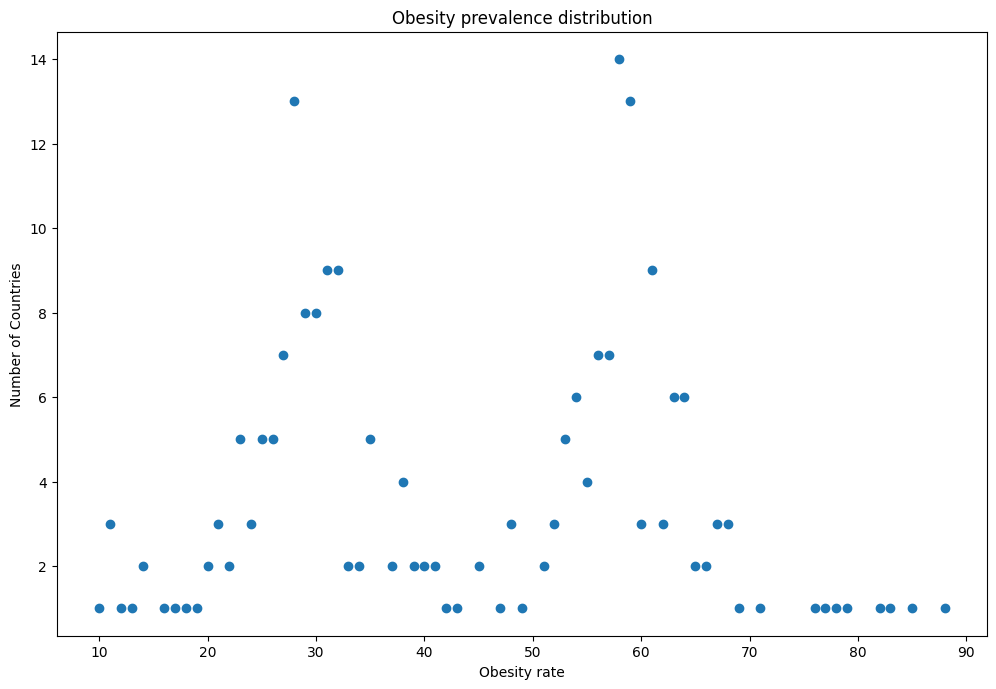

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(p2c["round_avg_obesity"], p2c["count"])
plt.title("Obesity prevalence distribution")
plt.xlabel("Obesity rate")
plt.ylabel("Number of Countries")
plt.show()

#### 2d) Prevalence of HIV

(x-axis: country, y-axis: # average health expenditure per capita)

In [ ]:
%%bigquery --project $project_id p2d

SELECT ROUND(avg_hiv, 2) round_avg_hiv, COUNT(avg_hiv) count
FROM (
  SELECT country_name, AVG(value) avg_hiv
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Prevalence of HIV, total%'
  AND year >= 2015
  GROUP BY country_name
)
GROUP BY round_avg_hiv
ORDER BY round_avg_hiv

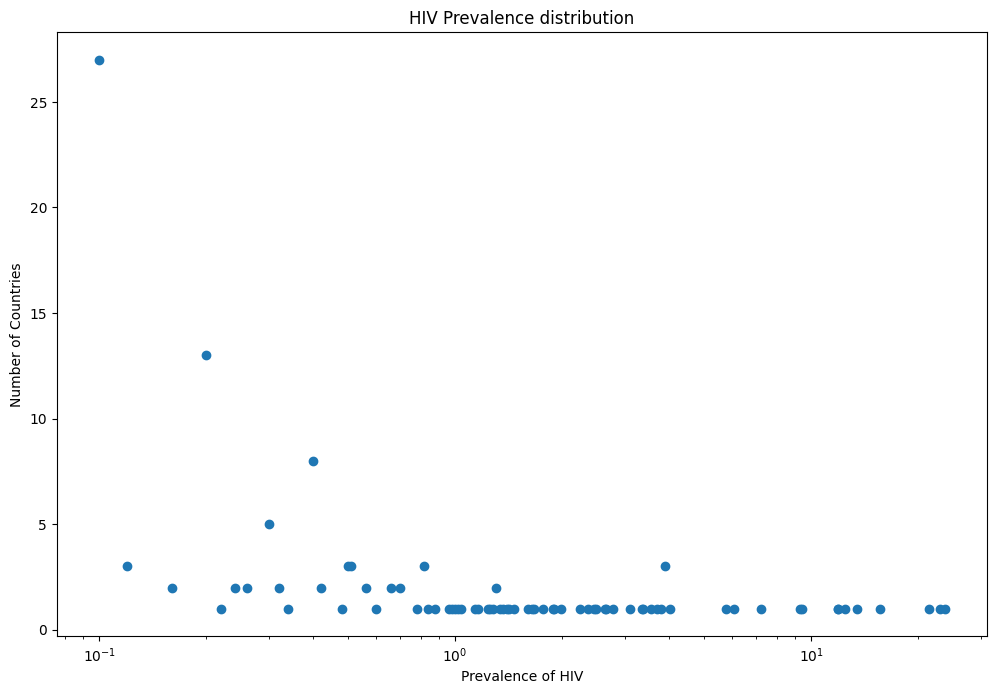

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(p2d["round_avg_hiv"], p2d["count"])
plt.xscale("log")
plt.title("HIV Prevalence distribution")
plt.xlabel("Prevalence of HIV")
plt.ylabel("Number of Countries")
plt.show()

---
### 3) How does education correlate?



#### 3a) School enrollment rate and health expenditure per capita: (x-axis: country, y-axis: # average health expenditure per capita).

To keep the chart readable, we've only kept the 20 countries with the highest average health expenditure per capita from 2015 onwards.

In [ ]:
%%bigquery --project $project_id p3a

SELECT exp.country_name, AVG(value) avg_enrollment, avg_expenditure
FROM (
  SELECT country_name, AVG(value) avg_expenditure
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Current health expenditure per capita%'
  AND country_name NOT LIKE 'North America'
  AND country_name NOT LIKE 'Post-demographic dividend'
  AND country_name NOT LIKE 'High income'
  AND country_name NOT LIKE 'OECD members'
  AND country_name NOT LIKE 'Euro area'
  AND year >= 2015
  GROUP BY country_name
  ORDER BY avg_expenditure DESC
  LIMIT 20
) exp, `bigquery-public-data.world_bank_health_population.health_nutrition_population` hnp
WHERE exp.country_name = hnp.country_name
AND indicator_name LIKE 'School enrollment%'
AND year >= 2015
GROUP BY country_name, avg_expenditure
ORDER BY avg_expenditure DESC

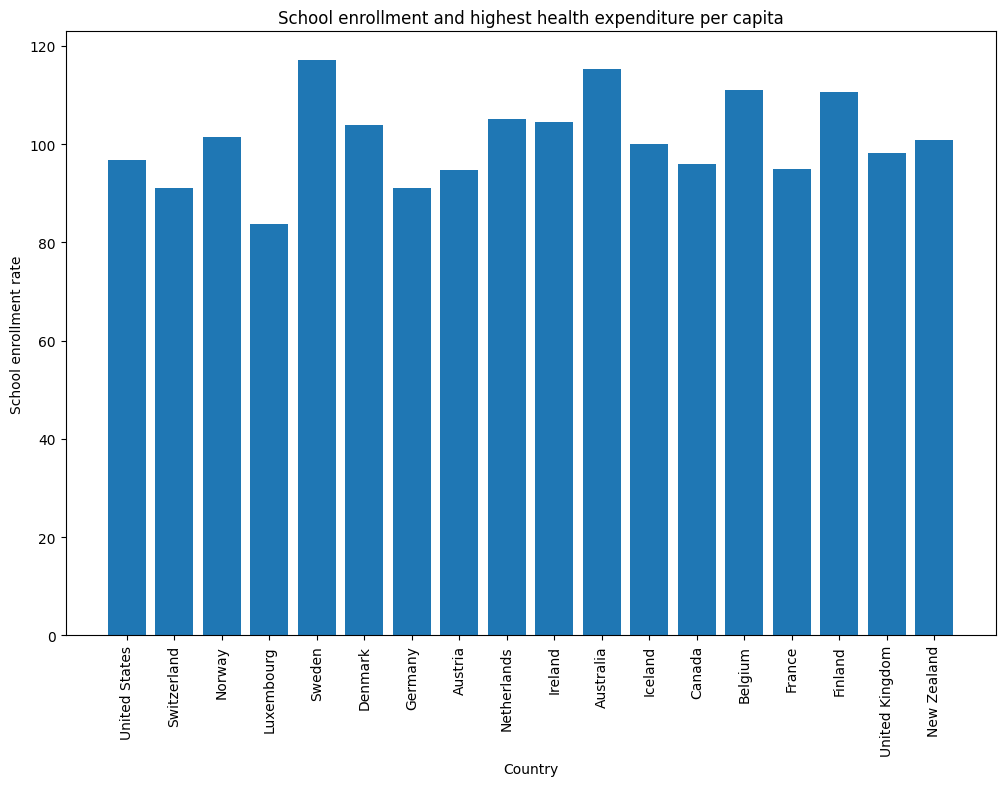

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.bar(p3a["country_name"], p3a["avg_enrollment"])
plt.xticks(p3a["country_name"], rotation='vertical')
plt.title("School enrollment and highest health expenditure per capita")
plt.xlabel("Country")
plt.ylabel("School enrollment rate")
plt.show()

#### 3b) School enrollment rate and life expectancy

(x-axis: expected age, y-axis: # of countries with that life expectancy)

In [ ]:
%%bigquery --project $project_id p3b

SELECT round_avg_life_exp, AVG(avg_enrollment) final_enroll_avg
FROM (
  SELECT life.country_name, AVG(value) avg_enrollment, round_avg_life_exp
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` hnp,
  (
    SELECT country_name, ROUND(avg_life_expectancy, 0) round_avg_life_exp, COUNT(avg_life_expectancy) count
    FROM (
      SELECT country_name, AVG(value) avg_life_expectancy
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
      WHERE indicator_name LIKE 'Life expectancy%'
      AND year >= 2015
      GROUP BY country_name
    )
    GROUP BY country_name, round_avg_life_exp
    ORDER BY round_avg_life_exp
  ) life
  WHERE indicator_name LIKE 'School enrollment%'
  AND life.country_name = hnp.country_name
  AND year >= 2015
  GROUP BY country_name, round_avg_life_exp
  ORDER BY round_avg_life_exp
)
GROUP BY round_avg_life_exp
ORDER BY round_avg_life_exp

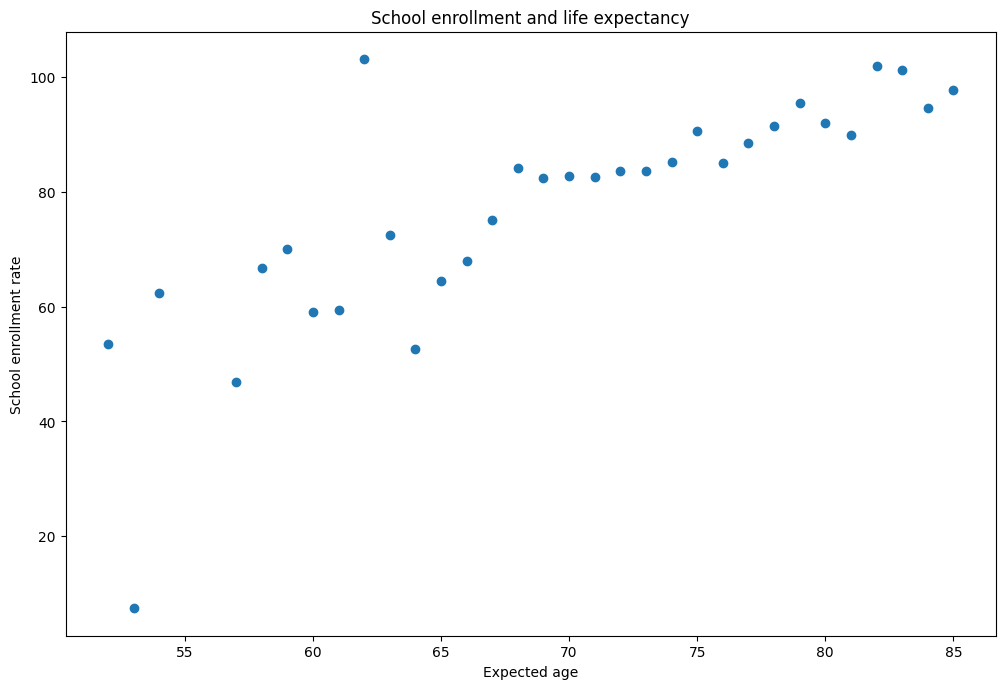

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(p3b["round_avg_life_exp"], p3b["final_enroll_avg"])
plt.title("School enrollment and life expectancy")
plt.xlabel("Expected age")
plt.ylabel("School enrollment rate")
plt.show()

#### 3c) School enrollment rate and obesity rates

(x-axis: expected age, y-axis: # of countries with that life expectancy)

In [ ]:
%%bigquery --project $project_id p3c

SELECT round_avg_obesity, AVG(avg_enrollment) final_enroll_avg
FROM (
  SELECT life.country_name, AVG(value) avg_enrollment, round_avg_obesity
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` hnp,
  (
    SELECT country_name, ROUND(avg_obesity, 0) round_avg_obesity, COUNT(avg_obesity) count
    FROM (
      SELECT country_name, AVG(value) avg_obesity
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
      WHERE indicator_name LIKE 'Prevalence of overweight (% of adults)'
      AND year >= 2015
      GROUP BY country_name
    )
    GROUP BY country_name, round_avg_obesity
    ORDER BY round_avg_obesity
  ) life
  WHERE indicator_name LIKE 'School enrollment%'
  AND life.country_name = hnp.country_name
  AND year >= 2015
  GROUP BY country_name, round_avg_obesity
  ORDER BY round_avg_obesity
)
GROUP BY round_avg_obesity
ORDER BY round_avg_obesity

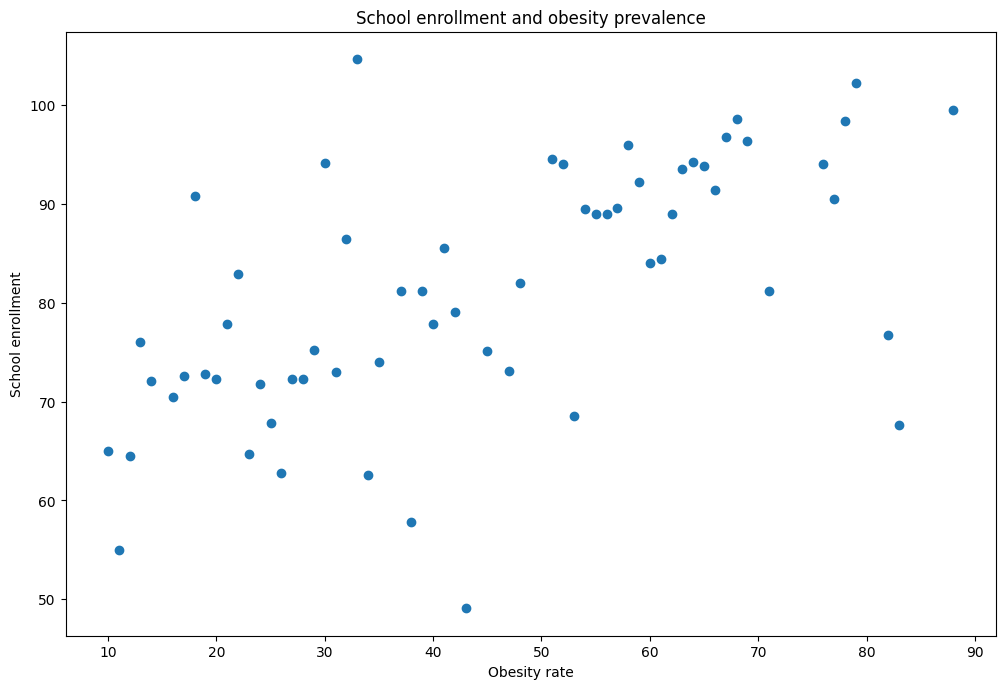

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(p3c["round_avg_obesity"], p3c["final_enroll_avg"])
plt.title("School enrollment and obesity prevalence")
plt.xlabel("Obesity rate")
plt.ylabel("School enrollment")
plt.show()

#### 3d) School enrollment rate and HIV rates

(x-axis: expected age, y-axis: # of countries with that life expectancy)

In [7]:
%%bigquery --project $project_id p3d

SELECT round_avg_hiv, AVG(avg_enrollment) final_enroll_avg
FROM (
  SELECT life.country_name, AVG(value) avg_enrollment, round_avg_hiv
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` hnp,
  (
    SELECT country_name, ROUND(avg_hiv, 2) round_avg_hiv, COUNT(avg_hiv) count
    FROM (
      SELECT country_name, AVG(value) avg_hiv
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
      WHERE indicator_name LIKE 'Prevalence of HIV, total%'
      AND year >= 2015
      GROUP BY country_name
    )
    GROUP BY country_name, round_avg_hiv
    ORDER BY round_avg_hiv
  ) life
  WHERE indicator_name LIKE 'School enrollment%'
  AND life.country_name = hnp.country_name
  AND year >= 2015
  GROUP BY country_name, round_avg_hiv
  ORDER BY round_avg_hiv
)
GROUP BY round_avg_hiv
ORDER BY round_avg_hiv

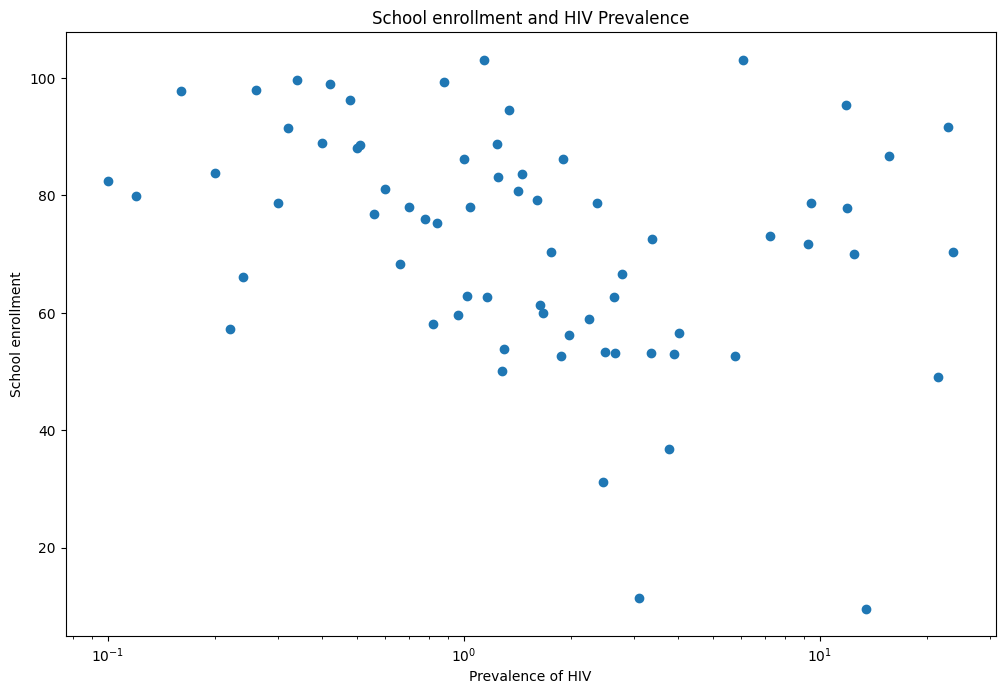

In [ ]:
plt.figure(figsize=(12,8), dpi= 100, facecolor='w', edgecolor='k')
plt.scatter(p3d["round_avg_hiv"], p3d["final_enroll_avg"])
plt.xscale("log")
plt.title("School enrollment and HIV Prevalence")
plt.xlabel("Prevalence of HIV")
plt.ylabel("School enrollment")
plt.show()

## Data Prediction

In [11]:
# create dataset
model_dataset_name = 'bqml_worldhealth'
dataset = bigquery.Dataset(client.dataset(model_dataset_name))
dataset.location = 'US'
client.create_dataset(dataset)

Dataset(DatasetReference('cs145-pset-1', 'bqml_worldhealth'))

Get Training Data

In [10]:
# get training data
%%bigquery --project $project_id p3d

SELECT IF (country_name in (
  SELECT country_name, 
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` t1
  WHERE indicator_name LIKE 'School enrollment%'
  AND year >= 2015 
GROUP BY country_name
HAVING AVG(value) > 0.83
), 1, 0) label, avg_hiv, avg_obesity, avg_expenditure

FROM 
(
  SELECT country_name, AVG(value) avg_hiv
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` t2
      WHERE indicator_name LIKE 'Prevalence of HIV, total%'
      AND year >= 2015
      GROUP BY country_name  
),
(
    SELECT country_name as t3, AVG(value) avg_obesity
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
      WHERE indicator_name LIKE 'Prevalence of overweight (% of adults)'
      AND year >= 2015
      GROUP BY country_name
),
(
    SELECT country_name as t4, AVG(value) avg_expenditure
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Current health expenditure per capita%'
  AND country_name NOT LIKE 'North America'
  AND country_name NOT LIKE 'Post-demographic dividend'
  AND country_name NOT LIKE 'High income'
  AND country_name NOT LIKE 'OECD members'
  AND country_name NOT LIKE 'Euro area'
  AND year >= 2015
  GROUP BY country_name
  ORDER BY avg_expenditure DESC
)
LIMIT 10

For some reason, Colab is not printing the output to our queries, so here it is below as a screenshot from BigQuery:

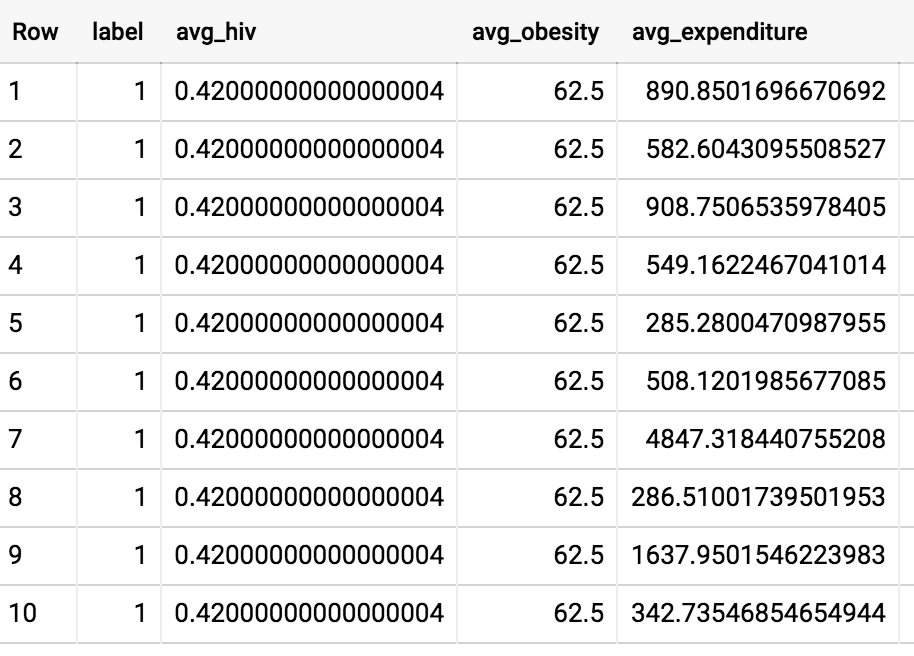

Create model (trained on years 2015-present)

In [13]:
%%bigquery --project $project_id p3d

CREATE OR REPLACE MODEL `bqml_worldhealth.worldhealth_model` 
OPTIONS (model_type = 'logistic_reg') AS
SELECT IF (country_name in (
  SELECT country_name, 
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` t1
  WHERE indicator_name LIKE 'School enrollment%'
  AND year >= 2015 
GROUP BY country_name
HAVING AVG(value) > 0.83
), 1, 0) label, avg_hiv, avg_obesity, avg_expenditure

FROM 
(
  SELECT country_name, AVG(value) avg_hiv
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` t2
      WHERE indicator_name LIKE 'Prevalence of HIV, total%'
      AND year >= 2015
      GROUP BY country_name  
),
(
    SELECT country_name as t3, AVG(value) avg_obesity
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
      WHERE indicator_name LIKE 'Prevalence of overweight (% of adults)'
      AND year >= 2015
      GROUP BY country_name
),
(
    SELECT country_name as t4, AVG(value) avg_expenditure
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Current health expenditure per capita%'
  AND country_name NOT LIKE 'North America'
  AND country_name NOT LIKE 'Post-demographic dividend'
  AND country_name NOT LIKE 'High income'
  AND country_name NOT LIKE 'OECD members'
  AND country_name NOT LIKE 'Euro area'
  AND year >= 2015
  GROUP BY country_name
  ORDER BY avg_expenditure DESC
)

View Training stats

In [12]:
%%bigquery --project $project_id

# Run cell to view training stats

SELECT
  *
FROM
  ML.TRAINING_INFO(MODEL `bqml_worldhealth.worldhealth_model`)

,training_run,iteration,loss,eval_loss,learning_rate,duration_ms
0,0,7,0.270191,0.257421,25.6,33246
1,0,6,0.270543,0.257688,12.8,29923
2,0,5,0.274669,0.263394,6.4,32129
3,0,4,0.305889,0.297556,3.2,31000
4,0,3,0.389963,0.384803,1.6,29655
5,0,2,0.502380,0.499635,0.8,31089
6,0,1,0.596951,0.595695,0.4,33084
7,0,0,0.658285,0.657852,0.2,22691


Evaluate model on evaluation data (years between 2010-2015)

In [20]:
%%bigquery --project $project_id p3d

SELECT
  *
FROM
  ML.EVALUATE(MODEL `bqml_worldhealth.worldhealth_model`, (
SELECT IF (country_name in (
  SELECT country_name, 
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` t1
  WHERE indicator_name LIKE 'School enrollment%'
  AND year >= 2010 AND year < 2015
GROUP BY country_name
HAVING AVG(value) > 0.83
), 1, 0) label, avg_hiv, avg_obesity, avg_expenditure

FROM 
(
  SELECT country_name, AVG(value) avg_hiv
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` t2
      WHERE indicator_name LIKE 'Prevalence of HIV, total%'
      AND year >= 2010 AND year < 2015
      GROUP BY country_name  
),
(
    SELECT country_name as t3, AVG(value) avg_obesity
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
      WHERE indicator_name LIKE 'Prevalence of overweight (% of adults)'
      AND year >= 2010 AND year < 2015
      GROUP BY country_name
),
(
    SELECT country_name as t4, AVG(value) avg_expenditure
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Current health expenditure per capita%'
  AND country_name NOT LIKE 'North America'
  AND country_name NOT LIKE 'Post-demographic dividend'
  AND country_name NOT LIKE 'High income'
  AND country_name NOT LIKE 'OECD members'
  AND country_name NOT LIKE 'Euro area'
  AND year >= 2010 AND year < 2015
  GROUP BY country_name
  ORDER BY avg_expenditure DESC
)))

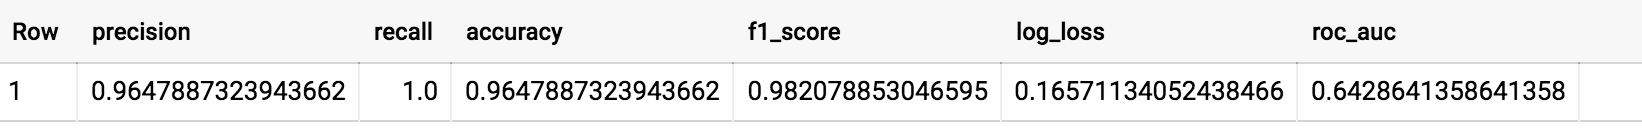

Predict on testing data (between yearrs 2000 and 2010)

In [ ]:
%%bigquery --project $project_id p3d

SELECT
  predicted_label, f1, f2, f3
FROM
  ML.PREDICT(MODEL `bqml_worldhealth.worldhealth_model`, 
(SELECT avg_hiv f1, avg_obesity f2, avg_expenditure f3
FROM 
(
  SELECT country_name, AVG(value) avg_hiv
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population` t2
      WHERE indicator_name LIKE 'Prevalence of HIV, total%'
      AND year >= 2000 AND year < 2010
      GROUP BY country_name  
),
(
    SELECT country_name as t3, AVG(value) avg_obesity
      FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
      WHERE indicator_name LIKE 'Prevalence of overweight (% of adults)'
      AND year >= 2000 AND year < 2010
      GROUP BY country_name
),
(
    SELECT country_name as t4, AVG(value) avg_expenditure
  FROM `bigquery-public-data.world_bank_health_population.health_nutrition_population`
  WHERE indicator_name LIKE 'Current health expenditure per capita%'
  AND country_name NOT LIKE 'North America'
  AND country_name NOT LIKE 'Post-demographic dividend'
  AND country_name NOT LIKE 'High income'
  AND country_name NOT LIKE 'OECD members'
  AND country_name NOT LIKE 'Euro area'
  AND year >= 2000 AND year < 2010
  GROUP BY country_name
  ORDER BY avg_expenditure DESC
)))
LIMIT 30

## Conclusion


According to our model, we see that health factors, including HIV rate, obesity rate, and the expenditure per capita on healthcare are good predictors of education attained in a country (defined here as the enrollment rate in school for youth). However, the limitations to this model include the fact that there are many other health factors that may affect a child's ability to attend school (such as availability of hospital beds, percent of population insured, prevalence of teen pregnancy, etc.), and that education has many definitions, and school-aged children's enrollment status is only one facet of education level. 

We were somewhat surprised by the model's high performance because none of our three features alone had a strong correlation to enrollment rate when doing our exploration queries. One explanation for this is that while individually, those three features cannot predict enrollment rate, when combined, they may have strong correlations to each other. For example, a country with a high HIV rate may not spend as much money per person on health, and a country that has both a high HIV rate and low expenditure may be more likely to have a lower education level than a country that just has one of those factors.

We also noticed that, compared to our accuracy and other metrics, our AUROC was on the lower end (around 0.65). This indicates that our model is better at classifying one label than another, which is another limitation we should keep in mind. 